# SVM Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

## Load Data

In [6]:
X = []
y = []
fr = open('dataset/testSet.txt')
for line in fr.readlines():
    lineArr = line.strip().split('\t')
    X.append([float(lineArr[0]), float(lineArr[1])])
    y.append(float(lineArr[2]))
X = np.mat(X)
print(X.shape)
print(len(y))

(100, 2)
100


## Train

In [7]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [12]:
w = clf.coef_[0]  # 获取分割超平面
a = -w[0]/w[1]  # 斜率
xx = np.linspace(-2, 10)  # xx、yy 为超平面坐标
yy = a * xx - (clf.intercept_[0]) / w[1]

In [13]:
# 通过支持向量绘制分割超平面
print(("support_vectors_=", clf.support_vectors_))
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

('support_vectors_=', array([[ 4.658191,  3.507396],
       [ 3.457096, -0.082216],
       [ 6.080573,  0.418886]]))


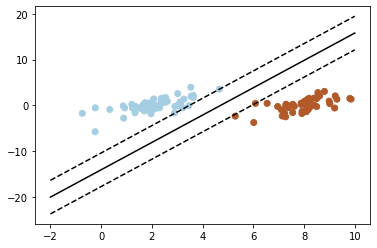

In [14]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.scatter([X[:, 0]], [X[:, 1]], c=y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()